https://github.com/bnsreenu/python_for_microscopists/blob/master/088-autoencoder_anomaly_V0.1.py

https://www.youtube.com/watch?v=u1vLJBwOFC8

In [1]:
import pandas as pd
df = pd.read_csv('anomaly.csv')

/home/sjhyeon/venv/lib/python3.6/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
print(df.groupby('Quality')['Quality'].count())

df.drop(['Date'], axis=1, inplace=True)
#print(df.head())

#If there are missing entries, drop them.
df.dropna(inplace=True,axis=1)


#COnvert non-numeric to numeric
df.Quality[df.Quality == 'Good'] = 1
df.Quality[df.Quality == 'Bad'] = 2


good_mask = df['Quality']== 1 #All good to be True for good data points
bad_mask = df['Quality']== 2 #All values False for good data points
#print(good_mask.head())

df.drop('Quality',axis=1,inplace=True)

df_good = df[good_mask]
df_bad = df[bad_mask]

print(f"Good count: {len(df_good)}")
print(f"Bad count: {len(df_bad)}")

# This is the feature vector that goes to the neural net
x_good = df_good.values
x_bad = df_bad.values

from sklearn.model_selection import train_test_split

x_good_train, x_good_test = train_test_split(
        x_good, test_size=0.25, random_state=42)

print(f"Good train count: {len(x_good_train)}")
print(f"Good test count: {len(x_good_test)}")


Quality
Bad      407
Good    1054
Name: Quality, dtype: int64
Good count: 1054
Bad count: 407
Good train count: 790
Good test count: 264


/home/sjhyeon/venv/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/home/sjhyeon/venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [3]:
from sklearn import metrics
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(10, input_dim=x_good.shape[1], activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(x_good.shape[1])) 
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                30        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 33        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
Total params: 125
Trainable params: 125
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.fit(x_good_train,x_good_train,verbose=1,epochs=100)

Epoch 1/100
25/25 [==============================] - 0s 1ms/step - loss: 4499.0946
Epoch 2/100
25/25 [==============================] - 0s 908us/step - loss: 3914.8914
Epoch 3/100
25/25 [==============================] - 0s 712us/step - loss: 3167.8717
Epoch 4/100
25/25 [==============================] - 0s 786us/step - loss: 2154.4080
Epoch 5/100
25/25 [==============================] - 0s 684us/step - loss: 1036.0378
Epoch 6/100
25/25 [==============================] - 0s 779us/step - loss: 229.8377
Epoch 7/100
25/25 [==============================] - 0s 701us/step - loss: 7.4065
Epoch 8/100
25/25 [==============================] - 0s 627us/step - loss: 1.9361
Epoch 9/100
25/25 [==============================] - 0s 646us/step - loss: 1.2179
Epoch 10/100
25/25 [==============================] - 0s 600us/step - loss: 1.1070
Epoch 11/100
25/25 [==============================] - 0s 647us/step - loss: 1.2131
Epoch 12/100
25/25 [==============================] - 0s 989us/step - loss: 1.109

In [5]:
pred = model.predict(x_good_test)
score1 = np.sqrt(metrics.mean_squared_error(pred,x_good_test))

pred = model.predict(x_good)
score2 = np.sqrt(metrics.mean_squared_error(pred,x_good))

pred = model.predict(x_bad)
score3 = np.sqrt(metrics.mean_squared_error(pred,x_bad))

print(f"Insample Good Score (RMSE): {score1}".format(score1))
print(f"Out of Sample Good Score (RMSE): {score2}")
print(f"Bad sample Score (RMSE): {score3}")

Insample Good Score (RMSE): 1.0574895601356746
Out of Sample Good Score (RMSE): 1.056823929465085
Bad sample Score (RMSE): 2.603613858294164


<AxesSubplot:xlabel='Date', ylabel='Close'>

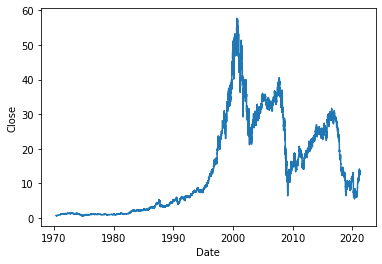

In [12]:
sns.lineplot(x=df['Date'], y=df['Close'])

In [13]:
print("Start date is: ", df['Date'].min())
print("End date is: ", df['Date'].max())

Start date is:  1970-05-11 00:00:00
End date is:  2021-05-10 00:00:00


In [14]:
train, test = df.loc[df['Date'] <= '2003-12-31'], df.loc[df['Date'] > '2003-12-31']

In [15]:
scaler = StandardScaler()
scaler = scaler.fit(train[['Close']])

train['Close'] = scaler.transform(train[['Close']])
test['Close'] = scaler.transform(test[['Close']])

/home/sjhyeon/venv/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/sjhyeon/venv/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [16]:
seq_size = 30

def to_sequences(x, y, seq_size=1):
    x_values = []
    y_values = []

    for i in range(len(x)-seq_size):
        #print(i)
        x_values.append(x.iloc[i:(i+seq_size)].values)
        y_values.append(y.iloc[i+seq_size])
        
    return np.array(x_values), np.array(y_values)

trainX, trainY = to_sequences(train[['Close']], train['Close'], seq_size)
testX, testY = to_sequences(test[['Close']], test['Close'], seq_size)


In [23]:
# model = Sequential()
# model.add(LSTM(128, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# model.add(LSTM(64, activation='relu', return_sequences=False))
# model.add(RepeatVector(trainX.shape[1]))
# model.add(LSTM(64, activation='relu', return_sequences=True))
# model.add(LSTM(128, activation='relu', return_sequences=True))
# model.add(TimeDistributed(Dense(trainX.shape[2])))

# model.compile(optimizer='adam', loss='mse')
# model.summary()

model = Sequential()
model.add(LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(rate=0.2))

model.add(RepeatVector(trainX.shape[1]))

model.add(LSTM(128, return_sequences=True))
model.add(Dropout(rate=0.2))
model.add(TimeDistributed(Dense(trainX.shape[2])))
model.compile(optimizer='adam', loss='mae')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 128)               66560     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 30, 128)           0         
_________________________________________________________________
lstm_5 (LSTM)                (None, 30, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 128)           0         
_________________________________________________________________
time_distributed_1 (TimeDist (None, 30, 1)             129       
Total params: 198,273
Trainable params: 198,273
Non-trainable params: 0
________________________________________________

Epoch 1/10
239/239 [==============================] - 10s 33ms/step - loss: 0.1239 - val_loss: 0.1808
Epoch 2/10
239/239 [==============================] - 8s 32ms/step - loss: 0.0440 - val_loss: 0.0745
Epoch 3/10
239/239 [==============================] - 8s 32ms/step - loss: 0.0339 - val_loss: 0.0757
Epoch 4/10
239/239 [==============================] - 8s 32ms/step - loss: 0.0348 - val_loss: 0.0990
Epoch 5/10
239/239 [==============================] - 8s 32ms/step - loss: 0.0317 - val_loss: 0.0850
Epoch 6/10
239/239 [==============================] - 8s 32ms/step - loss: 0.0317 - val_loss: 0.0553
Epoch 7/10
239/239 [==============================] - 8s 33ms/step - loss: 0.0303 - val_loss: 0.0657
Epoch 8/10
239/239 [==============================] - 8s 33ms/step - loss: 0.0288 - val_loss: 0.0590
Epoch 9/10
239/239 [==============================] - 9s 37ms/step - loss: 0.0286 - val_loss: 0.1090
Epoch 10/10
239/239 [==============================] - 8s 33ms/step - loss: 0.0289 - val_l

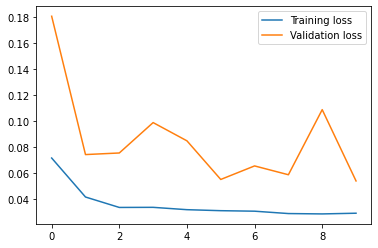

In [24]:
history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_split=0.1, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()


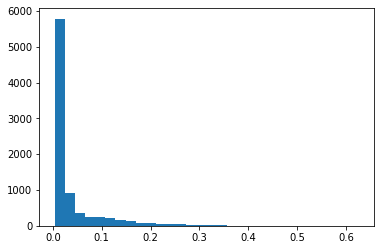

In [33]:
trainPredict = model.predict(trainX)
trainMAE = np.mean(np.abs(trainPredict - trainX), axis=1)
plt.hist(trainMAE, bins=30)
max_trainMAE = 0.3

(array([239., 870., 809., 561., 433., 358., 279., 200., 139., 129.,  82.,
         46.,  43.,  35.,  24.,  32.,  16.,  11.,   4.,   4.,   6.,   9.,
          2.,   2.,   2.,   0.,   2.,   0.,   0.,   1.]),
 array([0.00672264, 0.02007298, 0.03342332, 0.04677367, 0.06012401,
        0.07347435, 0.08682469, 0.10017503, 0.11352538, 0.12687572,
        0.14022606, 0.1535764 , 0.16692674, 0.18027708, 0.19362743,
        0.20697777, 0.22032811, 0.23367845, 0.24702879, 0.26037914,
        0.27372948, 0.28707982, 0.30043016, 0.3137805 , 0.32713085,
        0.34048119, 0.35383153, 0.36718187, 0.38053221, 0.39388256,
        0.4072329 ]),
 <BarContainer object of 30 artists>)

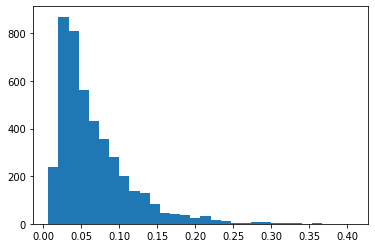

In [34]:
testPredict = model.predict(testX)
testMAE = np.mean(np.abs(testPredict - testX), axis=1)
plt.hist(testMAE, bins=30)


In [35]:
anomaly_df = pd.DataFrame(test[seq_size:])
anomaly_df['testMAE'] = testMAE
anomaly_df['max_trainMAE'] = max_trainMAE
anomaly_df['anomaly'] = anomaly_df['testMAE'] > anomaly_df['max_trainMAE']
anomaly_df['Close'] = test[seq_size:]['Close']

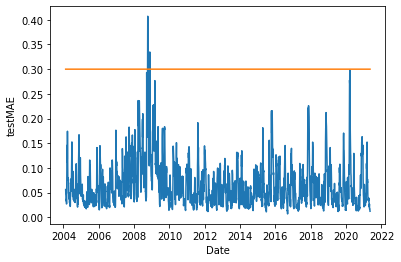

In [38]:
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['testMAE'])
sns.lineplot(x=anomaly_df['Date'], y=anomaly_df['max_trainMAE'])

anomalies = anomaly_df.loc[anomaly_df['anomaly'] == True]



<AxesSubplot:xlabel='Date'>

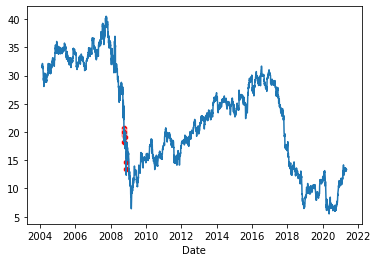

In [39]:
#Plot anomalies
sns.lineplot(x=anomaly_df['Date'], y=scaler.inverse_transform(anomaly_df['Close']))
sns.scatterplot(x=anomalies['Date'], y=scaler.inverse_transform(anomalies['Close']), color='r')


In [37]:
anomalies

,Date,Close,testMAE,max_trainMAE,anomaly
9696,2008-10-07,0.749434,0.318478,0.3,True
9697,2008-10-08,0.774843,0.362269,0.3,True
9698,2008-10-09,0.655784,0.361696,0.3,True
9699,2008-10-10,0.836551,0.407233,0.3,True
9700,2008-10-13,0.800252,0.337403,0.3,True
9701,2008-10-14,0.789363,0.302325,0.3,True
9703,2008-10-16,0.719669,0.305334,0.3,True
9729,2008-11-21,0.294250,0.334833,0.3,True
9730,2008-11-24,0.383545,0.326511,0.3,True
